In [1]:
import pulp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
customers_df = pd.read_csv("4.coupon/customers.csv")

In [3]:
customers_df.shape

(5000, 3)

In [4]:
customers_df.head()

,customer_id,age_cat,freq_cat
0,1,age20~34,freq2
1,2,age35~49,freq0
2,3,age35~49,freq0
3,4,age~19,freq0
4,5,age35~49,freq0


<Axes: >

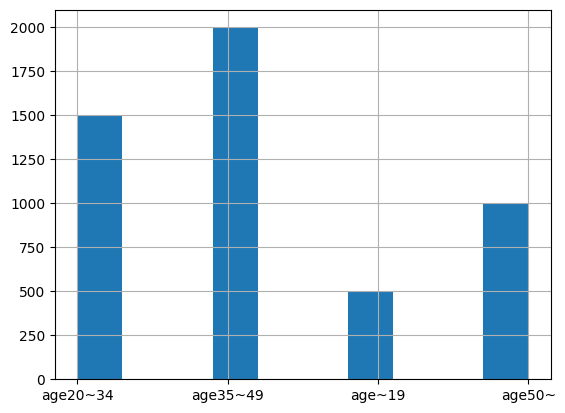

In [5]:
customers_df["age_cat"].hist()

<Axes: >

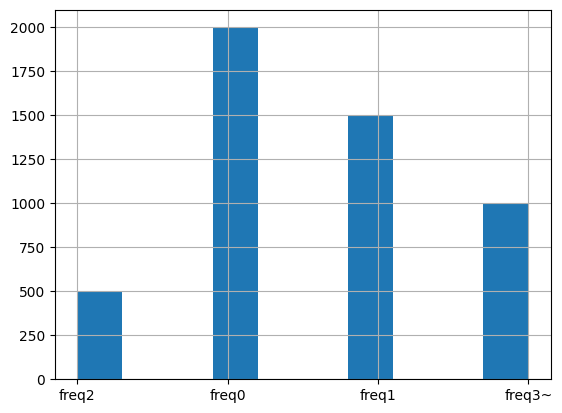

In [6]:
customers_df["freq_cat"].hist()

In [7]:
customer_pivot_df = pd.pivot_table(
    data=customers_df,
    index="age_cat",
    columns="freq_cat",
    values="customer_id",
    aggfunc="count",
)

In [8]:
customer_pivot_df = customer_pivot_df.reset_index()
customer_pivot_df = customer_pivot_df.set_index("age_cat")

In [9]:
customer_pivot_df

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200
age~19,200,150,50,100


In [10]:
fig = px.imshow(
    customer_pivot_df,
    x=customer_pivot_df.columns,
    y=customer_pivot_df.index,
    text_auto=True,
)
fig.update_layout(width=500, height=500)
fig.show()

In [11]:
prob_df = pd.read_csv("4.coupon/visit_probability.csv")

In [12]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [13]:
fig = make_subplots(rows=1, cols=3)
for idx, ptn in enumerate(["prob_dm1", "prob_dm2", "prob_dm3"]):
    idx += 1
    prob_pivot_df = pd.pivot_table(
        data=prob_df, values=ptn, index="age_cat", columns="freq_cat"
    )
    heatmap = go.Heatmap(
        z=prob_pivot_df.values,
        x=prob_pivot_df.columns,
        y=prob_pivot_df.index,
        coloraxis="coloraxis",
        text=prob_pivot_df.values,
        texttemplate="%{text:.2f}",
        textfont={"size": 12},
    )
    fig.add_trace(heatmap, row=1, col=idx)

fig.update_layout(height=400, width=1200)
fig.show()

In [14]:
problem = pulp.LpProblem("DiscountCouponProblem", pulp.LpMaximize)
customer_ids = customers_df["customer_id"].tolist()
M = [1, 2, 3]
xim = {}
for c in customer_ids:
    for m in M:
        xim[c, m] = pulp.LpVariable(name=f"xim({c}, {m})", cat="Binary")
len(xim)

15000

In [15]:
keys = ["age_cat", "freq_cat"]
customer_prob_df = customers_df.merge(prob_df, on=keys)
customer_prob_df.head()

,customer_id,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,1,age20~34,freq2,7,0.42,0.55,0.93
1,199,age20~34,freq2,7,0.42,0.55,0.93
2,200,age20~34,freq2,7,0.42,0.55,0.93
3,255,age20~34,freq2,7,0.42,0.55,0.93
4,269,age20~34,freq2,7,0.42,0.55,0.93


In [16]:
customer_prob_ver_df = customer_prob_df.rename(
    {"prob_dm1": 1, "prob_dm2": 2, "prob_dm3": 3}, axis=1
).melt(id_vars=["customer_id"], value_vars=[1, 2, 3], var_name="dm", value_name="prob")
customer_prob_ver_df.head()
Pim = {(row.customer_id, row.dm): row.prob for row in customer_prob_ver_df.itertuples()}

In [17]:
Pim

{(1, 1): 0.42,
 (199, 1): 0.42,
 (200, 1): 0.42,
 (255, 1): 0.42,
 (269, 1): 0.42,
 (319, 1): 0.42,
 (399, 1): 0.42,
 (426, 1): 0.42,
 (456, 1): 0.42,
 (459, 1): 0.42,
 (511, 1): 0.42,
 (575, 1): 0.42,
 (577, 1): 0.42,
 (642, 1): 0.42,
 (648, 1): 0.42,
 (673, 1): 0.42,
 (699, 1): 0.42,
 (703, 1): 0.42,
 (720, 1): 0.42,
 (747, 1): 0.42,
 (751, 1): 0.42,
 (787, 1): 0.42,
 (797, 1): 0.42,
 (847, 1): 0.42,
 (852, 1): 0.42,
 (902, 1): 0.42,
 (922, 1): 0.42,
 (976, 1): 0.42,
 (1026, 1): 0.42,
 (1069, 1): 0.42,
 (1118, 1): 0.42,
 (1131, 1): 0.42,
 (1197, 1): 0.42,
 (1202, 1): 0.42,
 (1211, 1): 0.42,
 (1264, 1): 0.42,
 (1275, 1): 0.42,
 (1404, 1): 0.42,
 (1453, 1): 0.42,
 (1490, 1): 0.42,
 (1501, 1): 0.42,
 (1505, 1): 0.42,
 (1520, 1): 0.42,
 (1559, 1): 0.42,
 (1579, 1): 0.42,
 (1592, 1): 0.42,
 (1629, 1): 0.42,
 (1650, 1): 0.42,
 (1735, 1): 0.42,
 (1748, 1): 0.42,
 (1891, 1): 0.42,
 (1892, 1): 0.42,
 (1929, 1): 0.42,
 (1932, 1): 0.42,
 (1933, 1): 0.42,
 (2021, 1): 0.42,
 (2053, 1): 0.42,
 (20

In [18]:
S = prob_df["segment_id"].to_list()
Ns = customer_prob_df.groupby("segment_id")["customer_id"].count().to_dict()
Si = customer_prob_df.set_index("customer_id")["segment_id"].to_dict()

In [19]:
# 　各ユーザーに必ず一種類のクーポンを配布する
for c in customer_ids:
    problem += pulp.lpSum(xim[c, m] for m in M) == 1

# クーポン付与による来客数を最大化する
problem += pulp.lpSum(
    xim[c, m] * (Pim[c, m] - Pim[c, 1]) for m in [2, 3] for c in customer_ids
)

# 会費の予算消費期待値の合計は100万円以下
Cm = {1: 0, 2: 1000, 3: 2000}
problem += (
    pulp.lpSum(xim[c, m] * Pim[c, m] * Cm[m] for m in [2, 3] for c in customer_ids)
    <= 1000000
)

# 各パターンのダイレクトメールをそれぞれのセグメントに属する会員10%以上に送付
for s in S:
    for m in M:
        pulp.lpSum(xim[c, m] for c in customer_ids if Si[c] == s) >= Ns[s] * 0.1

status = problem.solve()
print(pulp.LpStatus[status])
print(problem.objective.value())

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryoga_misu/.pyenv/versions/3.9.11/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/c661198960394f48a6d7c42916ca2eb2-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/c661198960394f48a6d7c42916ca2eb2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5006 COLUMNS
At line 70007 RHS
At line 75009 BOUNDS
At line 90010 ENDATA
Problem MODEL has 5001 rows, 15000 columns and 25000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 380.353 - 0.11 seconds
Cgl0004I processed model has 5001 rows, 15000 columns (15000 integer (15000 of which binary)) and 25000 elements
Cutoff increment increased from 1e-05 to 0.00999
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.2352

In [20]:
send_dm_df = pd.DataFrame(
    [[xim[c, m].value() for m in M] for c in customer_ids],
    columns=["send_dm1", "send_dm2", "send_dm3"],
)
send_dm_df.head()

,send_dm1,send_dm2,send_dm3
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [21]:
cust_send_df = pd.concat([customers_df, send_dm_df], axis=1)
cust_send_df.head()

,customer_id,age_cat,freq_cat,send_dm1,send_dm2,send_dm3
0,1,age20~34,freq2,1.0,0.0,0.0
1,2,age35~49,freq0,0.0,0.0,1.0
2,3,age35~49,freq0,0.0,0.0,1.0
3,4,age~19,freq0,0.0,0.0,1.0
4,5,age35~49,freq0,0.0,0.0,1.0


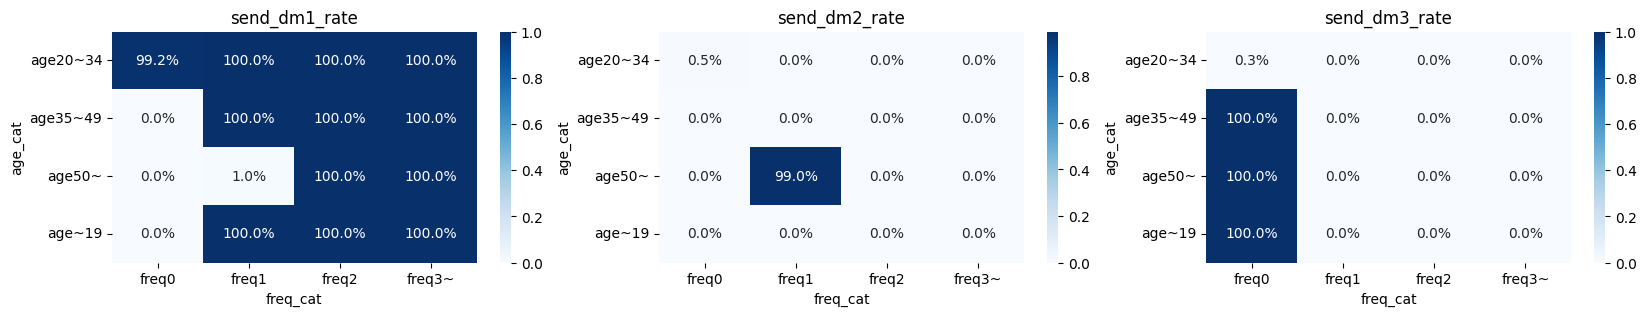

In [22]:
# 各セグメントに対する送付率のヒートマップ
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for idx, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(
        data=cust_send_df,
        index="age_cat",
        columns="freq_cat",
        values=ptn,
        aggfunc="mean",
    )
    sns.heatmap(
        cust_send_pivot_df, annot=True, fmt=".1%", cmap="Blues", vmin=0, ax=ax[idx]
    )
    ax[idx].set_title(f"{ptn}_rate")
plt.show()

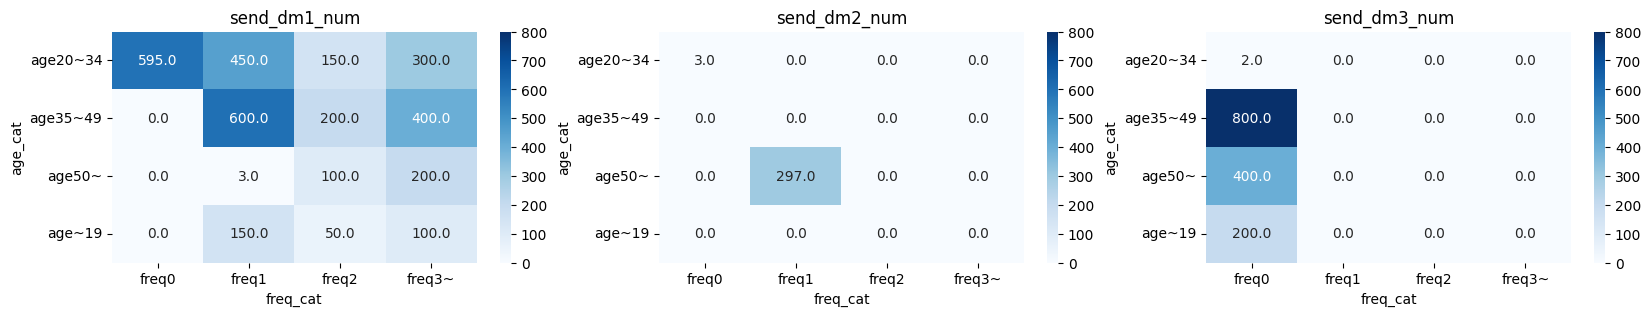

In [23]:
# 各セグメントに対する送付率のヒートマップ
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for idx, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(
        data=cust_send_df,
        index="age_cat",
        columns="freq_cat",
        values=ptn,
        aggfunc="sum",
    )
    sns.heatmap(
        cust_send_pivot_df, annot=True, fmt=".1f", cmap="Blues", vmax=800, ax=ax[idx]
    )
    ax[idx].set_title(f"{ptn}_num")
plt.show()

In [24]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [25]:
prob_ver_df = prob_df.rename(
    columns={"prob_dm1": 1, "prob_dm2": 2, "prob_dm3": 3}
).melt(id_vars="segment_id", value_vars=[1, 2, 3], var_name="dm", value_name="prob")

In [26]:
Psm = prob_ver_df.set_index(["segment_id", "dm"])["prob"].to_dict()

In [27]:
Psm

{(1, 1): 0.07,
 (2, 1): 0.21,
 (3, 1): 0.28,
 (4, 1): 0.35,
 (5, 1): 0.11,
 (6, 1): 0.32,
 (7, 1): 0.42,
 (8, 1): 0.52,
 (9, 1): 0.08,
 (10, 1): 0.25,
 (11, 1): 0.34,
 (12, 1): 0.42,
 (13, 1): 0.07,
 (14, 1): 0.21,
 (15, 1): 0.28,
 (16, 1): 0.35,
 (1, 2): 0.12,
 (2, 2): 0.3,
 (3, 2): 0.39,
 (4, 2): 0.45,
 (5, 2): 0.17,
 (6, 2): 0.43,
 (7, 2): 0.55,
 (8, 2): 0.63,
 (9, 2): 0.14,
 (10, 2): 0.35,
 (11, 2): 0.45,
 (12, 2): 0.52,
 (13, 2): 0.13,
 (14, 2): 0.33,
 (15, 2): 0.42,
 (16, 2): 0.49,
 (1, 3): 0.29,
 (2, 3): 0.58,
 (3, 3): 0.74,
 (4, 3): 0.77,
 (5, 3): 0.37,
 (6, 3): 0.72,
 (7, 3): 0.93,
 (8, 3): 0.94,
 (9, 3): 0.33,
 (10, 3): 0.67,
 (11, 3): 0.86,
 (12, 3): 0.89,
 (13, 3): 0.32,
 (14, 3): 0.65,
 (15, 3): 0.84,
 (16, 3): 0.88}

In [28]:
Ns

{1: 200,
 2: 150,
 3: 50,
 4: 100,
 5: 600,
 6: 450,
 7: 150,
 8: 300,
 9: 800,
 10: 600,
 11: 200,
 12: 400,
 13: 400,
 14: 300,
 15: 100,
 16: 200}

In [29]:
problem = pulp.LpProblem("DiscountCouponProblem2", pulp.LpMaximize)
S = prob_df["segment_id"].tolist()
M = [1, 2, 3]
xsm = {}
for s in S:
    for m in M:
        xsm[s, m] = pulp.LpVariable(
            name=f"xim({s}, {m})", cat="Continuous", lowBound=0, upBound=1
        )
print(f"len xsm: {len(xsm)}")

# 各セグメントに対してとあるクーポンを送る確率を足し合わせると100%になる。
for s in S:
    problem += pulp.lpSum(xsm[s, m] for m in M) == 1

# クーポンによる来客数の増加数を最大化
problem += pulp.lpSum(
    (Ns[s] * xsm[s, m] * (Psm[s, m] - Psm[s, 1])) for m in [2, 3] for s in S
)

# クーポンの配布した後の利用金額の期待値は100万円以下
problem += (
    pulp.lpSum(Ns[s] * xsm[s, m] * Psm[s, m] * Cm[m] for m in [2, 3] for s in S)
    <= 1000000
)

# 各セグメントの10%以上に各種類のクーポンを送付
for s in S:
    for m in M:
        problem += xsm[s, m] >= 0.1

status = problem.solve()
print(pulp.LpStatus[status])

len xsm: 48
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryoga_misu/.pyenv/versions/3.9.11/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/2e36fdccd5fb443aa1e3392e9a76d9fc-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/2e36fdccd5fb443aa1e3392e9a76d9fc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 231 RHS
At line 297 BOUNDS
At line 346 ENDATA
Problem MODEL has 65 rows, 48 columns and 128 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 17 (-48) rows, 32 (-16) columns and 64 (-64) elements
0  Obj 229 Dual inf 981.57657 (32)
6  Obj 326.0951
Optimal - objective value 326.0951
After Postsolve, objective 326.0951, infeasibilities - dual 11.960784 (3), primal 0 (0)
Presolved model was optimal, full model n

In [30]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [31]:
send_dm_df = pd.DataFrame(
    [[xsm[s, m].value() for m in M] for s in S],
    columns=["send_dm1", "send_dm2", "send_dm3"],
)
send_dm_df = pd.concat([prob_df, send_dm_df], axis=1)

In [32]:
send_dm_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3,send_dm1,send_dm2,send_dm3
0,age~19,freq0,1,0.07,0.12,0.29,0.1,0.800000,0.100000
1,age~19,freq1,2,0.21,0.30,0.58,0.8,0.100000,0.100000
2,age~19,freq2,3,0.28,0.39,0.74,0.8,0.100000,0.100000
3,age~19,freq3~,4,0.35,0.45,0.77,0.8,0.100000,0.100000
4,age20~34,freq0,5,0.11,0.17,0.37,0.8,0.100000,0.100000
5,age20~34,freq1,6,0.32,0.43,0.72,0.8,0.100000,0.100000
6,age20~34,freq2,7,0.42,0.55,0.93,0.8,0.100000,0.100000
7,age20~34,freq3~,8,0.52,0.63,0.94,0.8,0.100000,0.100000
8,age35~49,freq0,9,0.08,0.14,0.33,0.1,0.800000,0.100000
9,age35~49,freq1,10,0.25,0.35,0.67,0.8,0.100000,0.100000


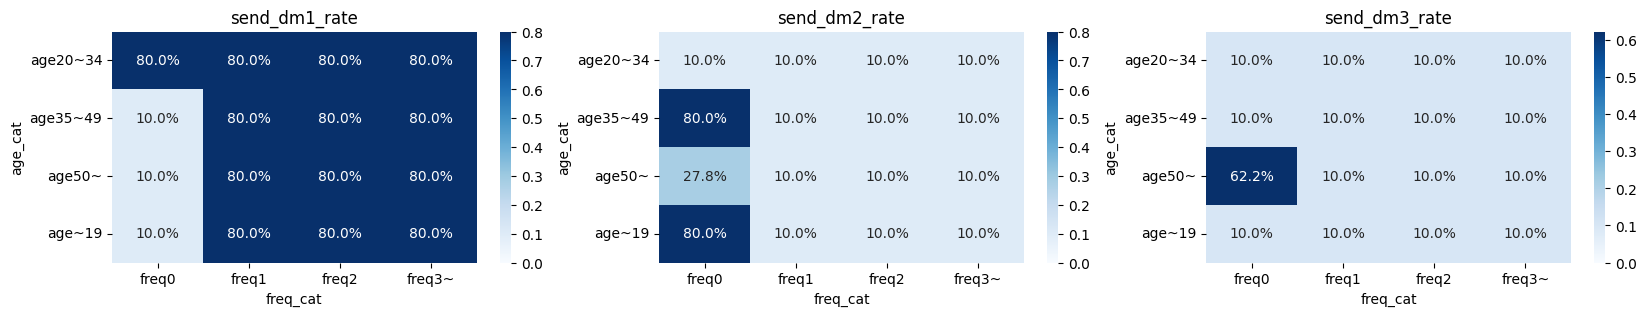

In [33]:
# 各セグメントに対する送付率のヒートマップ
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for idx, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(
        data=send_dm_df,
        index="age_cat",
        columns="freq_cat",
        values=ptn,
        aggfunc="mean",
    )
    sns.heatmap(
        cust_send_pivot_df, annot=True, fmt=".1%", cmap="Blues", vmin=0, ax=ax[idx]
    )
    ax[idx].set_title(f"{ptn}_rate")
plt.show()

In [34]:
problem = pulp.LpProblem("DiscountCouponProblem3", pulp.LpMaximize)
S = prob_df["segment_id"].tolist()
M = [1, 2, 3]
xsm = {}
for s in S:
    for m in M:
        xsm[s, m] = pulp.LpVariable(
            name=f"xim({s}, {m})", cat="Continuous", lowBound=0, upBound=1
        )
print(f"len xsm: {len(xsm)}")

# 各セグメントのXX%以上に各種類のクーポンを送付
y = pulp.LpVariable(name="y", cat="continuous", lowBound=0, upBound=1)
problem += y
for s in S:
    for m in M:
        problem += xsm[s, m] >= y

# 各セグメントに対してとあるクーポンを送る確率を足し合わせると100%になる。
for s in S:
    problem += pulp.lpSum(xsm[s, m] for m in M) == 1

# クーポンによる来客数の増加数を最大化
# problem += pulp.lpSum((Ns[s] * xsm[s, m] * (Psm[s, m] - Psm[s, 1])) for m in [2, 3] for s in S)

# クーポンの配布した後の利用金額の期待値は100万円以下
problem += (
    pulp.lpSum(Ns[s] * xsm[s, m] * Psm[s, m] * Cm[m] for m in [2, 3] for s in S)
    <= 1000000
)

status = problem.solve()
print(pulp.LpStatus[status])

len xsm: 48
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryoga_misu/.pyenv/versions/3.9.11/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/e260079172854f97b283903ef0dd0515-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/e260079172854f97b283903ef0dd0515-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 248 RHS
At line 314 BOUNDS
At line 364 ENDATA
Problem MODEL has 65 rows, 49 columns and 176 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 49 (-16) rows, 33 (-16) columns and 144 (-32) elements
Perturbing problem by 0.001% of 0.62819912 - largest nonzero change 0.00094529304 ( 0.15047666%) - largest zero change 9.6171668e-05
0  Obj -0 Dual inf 0.62725282 (1)
31  Obj 0.13116342 Primal inf 0.17027776 (2)
33

In [35]:
y.value()

0.13125943

In [36]:
problem = pulp.LpProblem("DiscountCouponProblem3", pulp.LpMaximize)
S = prob_df["segment_id"].tolist()
M = [1, 2, 3]
xsm = {}
for s in S:
    for m in M:
        xsm[s, m] = pulp.LpVariable(
            name=f"xim({s}, {m})", cat="Continuous", lowBound=0, upBound=1
        )
print(f"len xsm: {len(xsm)}")

# 各セグメントのXX%以上に各種類のクーポンを送付
# y = pulp.LpVariable(name="y", cat="continuous", lowBound=0, upBound=1)
# problem += y
for s in S:
    for m in M:
        problem += xsm[s, m] >= 0.13

# 各セグメントに対してとあるクーポンを送る確率を足し合わせると100%になる。
for s in S:
    problem += pulp.lpSum(xsm[s, m] for m in M) == 1

# クーポンによる来客数の増加数を最大化
problem += pulp.lpSum(
    (Ns[s] * xsm[s, m] * (Psm[s, m] - Psm[s, 1])) for m in [2, 3] for s in S
)

# クーポンの配布した後の利用金額の期待値は100万円以下
problem += (
    pulp.lpSum(Ns[s] * xsm[s, m] * Psm[s, m] * Cm[m] for m in [2, 3] for s in S)
    <= 1000000
)


status = problem.solve()
print(pulp.LpStatus[status])

len xsm: 48
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryoga_misu/.pyenv/versions/3.9.11/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/877307b7a4dc476893027c8197291ff9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/877307b7a4dc476893027c8197291ff9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 231 RHS
At line 297 BOUNDS
At line 346 ENDATA
Problem MODEL has 65 rows, 48 columns and 128 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 17 (-48) rows, 32 (-16) columns and 64 (-64) elements
0  Obj 297.7 Dual inf 981.57657 (32)
1  Obj 302.12846
Optimal - objective value 302.12846
After Postsolve, objective 302.12846, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 302.1284615 - 1 iterations

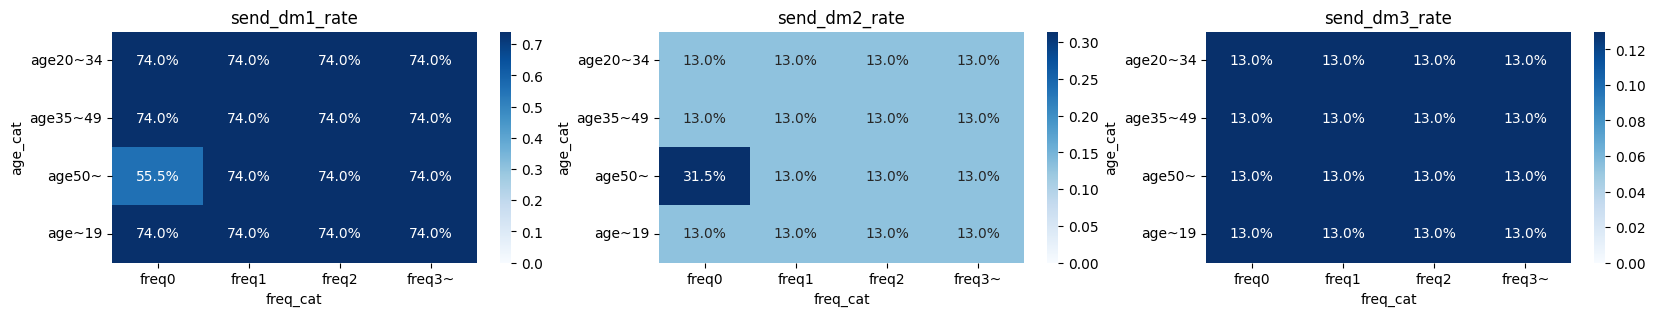

In [37]:
send_dm_df = pd.DataFrame(
    [[xsm[s, m].value() for m in M] for s in S],
    columns=["send_dm1", "send_dm2", "send_dm3"],
)
send_dm_df = pd.concat([prob_df, send_dm_df], axis=1)

# 各セグメントに対する送付率のヒートマップ
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for idx, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(
        data=send_dm_df,
        index="age_cat",
        columns="freq_cat",
        values=ptn,
        aggfunc="mean",
    )
    sns.heatmap(
        cust_send_pivot_df, annot=True, fmt=".1%", cmap="Blues", vmin=0, ax=ax[idx]
    )
    ax[idx].set_title(f"{ptn}_rate")
plt.show()

In [38]:
def solve_problem(name: str, cost: int):
    problem = pulp.LpProblem(name, pulp.LpMaximize)
    S = prob_df["segment_id"].tolist()
    M = [1, 2, 3]
    xsm = {}
    for s in S:
        for m in M:
            xsm[s, m] = pulp.LpVariable(
                name=f"xim({s}, {m})", cat="Continuous", lowBound=0, upBound=1
            )
    print(f"len xsm: {len(xsm)}")

    # 各セグメントのXX%以上に各種類のクーポンを送付
    for s in S:
        for m in M:
            problem += xsm[s, m] >= 0.1

    # 各セグメントに対してとあるクーポンを送る確率を足し合わせると100%になる。
    for s in S:
        problem += pulp.lpSum(xsm[s, m] for m in M) == 1

    # クーポンによる来客数の増加数を最大化
    problem += pulp.lpSum(
        (Ns[s] * xsm[s, m] * (Psm[s, m] - Psm[s, 1])) for m in [2, 3] for s in S
    )

    # クーポンの配布した後の利用金額の期待値は100万円以下
    problem += (
        pulp.lpSum(Ns[s] * xsm[s, m] * Psm[s, m] * Cm[m] for m in [2, 3] for s in S)
        <= cost
    )

    status = problem.solve()
    print(pulp.LpStatus[status])
    return problem, status

In [39]:
cost_list = []
cpa_list = []
inc_action_list = []

for cost in range(761850, 3000000, 100000):
    problem, status = solve_problem("DiscountCouponProblem4", cost=cost)
    inc_action = pulp.value(problem.objective)
    cpa = cost / inc_action
    cost_list.append(cost)
    cpa_list.append(cpa)
    inc_action_list.append(inc_action)
    print(f"status: {status}, cost: {cost}, inc_action: {inc_action}, cpa: {cpa}")

len xsm: 48
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryoga_misu/.pyenv/versions/3.9.11/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/efedb418ddba48cfa6991327e38e00a9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4c/_v_08jcn56vg9n8yz9rtp96r0000gn/T/efedb418ddba48cfa6991327e38e00a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 231 RHS
At line 297 BOUNDS
At line 346 ENDATA
Problem MODEL has 65 rows, 48 columns and 128 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-65) rows, 0 (-48) columns and 0 (-128) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 229
After Postsolve, objective 229, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 229 - 0 iterations time 0.002, Presolve 0.00


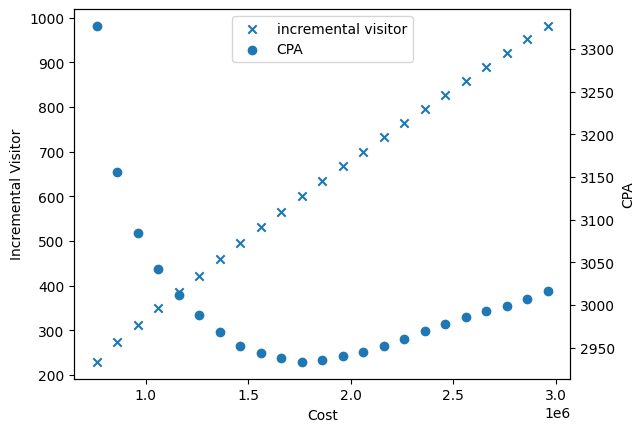

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(cost_list, inc_action_list, marker="x", label="incremental visitor")
ax2.scatter(cost_list, cpa_list, marker="o", label="CPA")

ax1.set_xlabel("Cost")
ax1.set_ylabel("Incremental Visitor")
ax2.set_ylabel("CPA")
reg1, label1 = ax1.get_legend_handles_labels()
reg2, label2 = ax2.get_legend_handles_labels()
ax2.legend(reg1 + reg2, label1 + label2, loc="upper center")
plt.show()